# KSE525 Assignment 1

# Setup

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [3]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


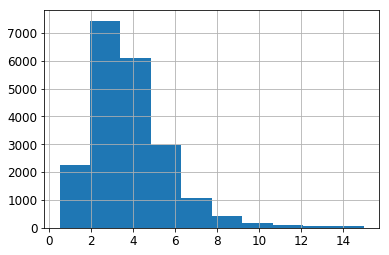

In [9]:
housing["median_income"].hist()

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### Q1: To sample 20% of records for a test set, we performed <font color=red>stratified sampling</font> based on the range of *median_income*. Explain why stratified sampling is needed in this case.

__Your Answer (less than 3 sentences):__ The reasons that `stratified sampling` is needed because: 
* The proportion of the population in each group is **not equal**, so we need to consider the *proportion of the group* (strata) members in the sampling.
* If we use the other sampling technique, it may not be a good representative of the attribute.
* Thus, the `stratified sampling` helps ensure a representative sample, especially when the data are **skewed** as above histogram.

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [13]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [15]:
housing = strat_train_set.copy()

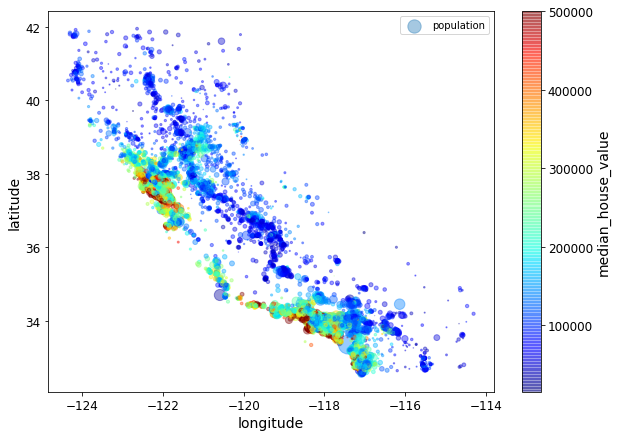

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### Q2: Provide your interpretation of the above visualization.

__Your Answer (less than 5 sentences):__ My findings are:
* The `median_house_value` along the coastal areas are **higher** than the `median_house_value` of the houses that located farther away (inland).
* The `population` is **dense** in the lower and upper regions along the coastline, as well as around the center of the state.
* The father from the coastline the houses are located, the **sparser** the `population` is. (The houses are mostly located near the coastal areas)
* There are some **very low** `median_house_value` located in the coastline which may have probability to be **outliers**.
* The `median_house_value`'s average along the coastal area is around 200000 to 300000, and the `median_house_value`'s average of the houses located inland is mostly lower than 100000.

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cf58a20>,
      dtype=object)

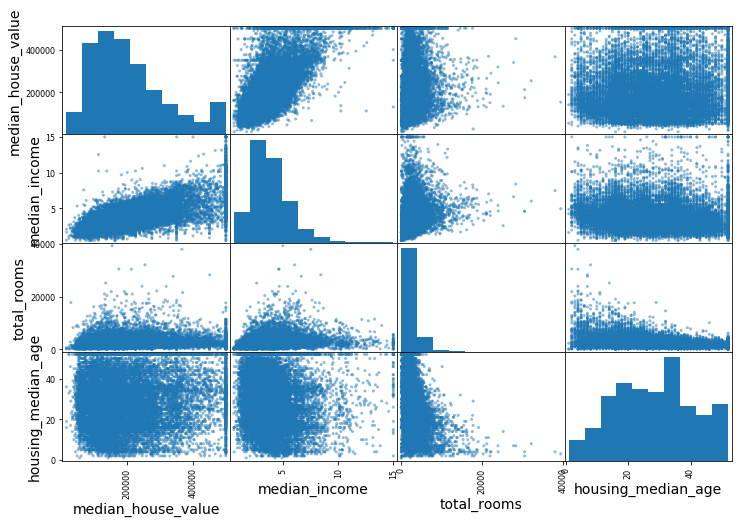

In [19]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

### Q3: Provide your interpretation of the above the scatter matrix.

__Your Answer (less than 10 sentences):__ My findings are:
* The correlation between `median_house_value` and `median_income` is pretty **high**. (higher income, higher house value)
* There is **no** correlation between `housing_median_age` and `median_house_value`.
* There is **no** correlation between `housing_median_age` and `median_income`
* There is **no** correlation between `housing_median_age` and `total_rooms`
* There is a **very small** correlation between (`median_house_value`, `median_income`) and `total_rooms`.

[0, 16, 0, 550000]

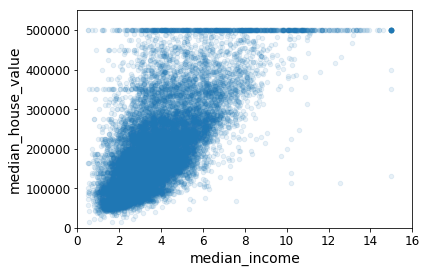

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

# Prepare the data for Machine Learning algorithms

In [21]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [39]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


__You noticed that the *total_bedrooms* attribute has some missing values, so let's fix this.__ __You have three options:__<br>

1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

### Q4: Write the python code for the three options. Use the <font color=red>median</font> for option 3.

#### Answer 4-1: Complete the line below.

In [40]:
# Option 1: Use dropna
sample_incomplete_rows = sample_incomplete_rows.dropna()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


#### Answer 4-2: Complete the line below.

In [41]:
# Option 2: Use drop
sample_incomplete_rows = housing.drop('total_bedrooms', axis=1)

#### Answer 4-3-1: Complete the line below.

In [43]:
median = housing["total_bedrooms"].median()
# Option 3: Use fillna
sample_incomplete_rows["total_bedrooms"] = housing.fillna(value={'total_bedrooms': median})["total_bedrooms"]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,total_bedrooms
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN,351.0
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN,108.0
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN,471.0
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND,371.0
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN,1525.0
19480,-120.97,37.66,24.0,2930.0,1448.0,570.0,3.5395,INLAND,588.0
8879,-118.50,34.04,52.0,2233.0,769.0,277.0,8.3839,<1H OCEAN,317.0
13685,-117.24,34.15,26.0,2041.0,936.0,375.0,6.0000,INLAND,293.0
4937,-118.26,33.99,47.0,1865.0,1916.0,438.0,1.8242,<1H OCEAN,465.0
4861,-118.28,34.02,29.0,515.0,2690.0,217.0,0.4999,<1H OCEAN,229.0


Scikit-Learn provides a handy class to take care of missing values: **Imputer**.
#### Answer 4-3-2: Complete the <font color=red>two</font> lines below. See the [Scikit-Learn document](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).

In [25]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy='median')

Remove the text attribute because median can only be calculated on numerical attributes:

In [26]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [27]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [44]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr[housing_tr.isnull().any(axis=1)].head()
# There should be no result

NameError: name 'imputer' is not defined